In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pprint as pp
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/mandyshe/pop-data/pop_songs_data.csv


In [2]:
df = pd.read_csv("../input/d/mandyshe/pop-data/pop_songs_data.csv")

In [3]:
df.head()

,date,song,artist,peak_rank,weeks_on_board,spotify_id,spotify_song,spotify_artist,acousticness,analysis_url,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,1958,Poor Little Fool,Ricky Nelson,1,11,0p1c2oNEQDd9MF1H3R9p3z,Poor Little Fool,Ricky Nelson,0.6710,https://api.spotify.com/v1/audio-analysis/0p1c...,...,0.214,-7.008,1,0.0304,155.507,4,https://api.spotify.com/v1/tracks/0p1c2oNEQDd9...,audio_features,spotify:track:0p1c2oNEQDd9MF1H3R9p3z,0.795
1,1958,Rock-in Robin,Bobby Day,2,21,4FlYcJnfkeBpowEHJ72Bmt,Rockin' Robin,Bobby Day,0.2980,https://api.spotify.com/v1/audio-analysis/4FlY...,...,0.234,-13.083,1,0.1060,171.992,4,https://api.spotify.com/v1/tracks/4FlYcJnfkeBp...,audio_features,spotify:track:4FlYcJnfkeBpowEHJ72Bmt,0.938
2,1958,Bird Dog,The Everly Brothers,2,18,2ZCkqAo0tzzCVOth7ityh5,Bird Dog,The Everly Brothers,0.6860,https://api.spotify.com/v1/audio-analysis/2ZCk...,...,0.166,-9.076,1,0.0354,141.194,4,https://api.spotify.com/v1/tracks/2ZCkqAo0tzzC...,audio_features,spotify:track:2ZCkqAo0tzzCVOth7ityh5,0.965
3,1958,Patricia,Perez Prado And His Orchestra,2,14,205EtD8tQnHDXMkmtYiaHF,Patricia,Pérez Prado,0.0862,https://api.spotify.com/v1/audio-analysis/205E...,...,0.115,-9.522,1,0.0457,137.396,4,https://api.spotify.com/v1/tracks/205EtD8tQnHD...,audio_features,spotify:track:205EtD8tQnHDXMkmtYiaHF,0.837
4,1958,My True Love,Jack Scott,3,14,2Un1O9CChp4wyTmt422XwW,My True Love,Jack Scott,0.8710,https://api.spotify.com/v1/audio-analysis/2Un1...,...,0.138,-11.387,1,0.0279,68.184,3,https://api.spotify.com/v1/tracks/2Un1O9CChp4w...,audio_features,spotify:track:2Un1O9CChp4wyTmt422XwW,0.238


In [4]:
df.columns.values.tolist()

['date',
 'song',
 'artist',
 'peak_rank',
 'weeks_on_board',
 'spotify_id',
 'spotify_song',
 'spotify_artist',
 'acousticness',
 'analysis_url',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'track_href',
 'type',
 'uri',
 'valence']

In [5]:
df.dtypes

date                  int64
song                 object
artist               object
peak_rank             int64
weeks_on_board        int64
spotify_id           object
spotify_song         object
spotify_artist       object
acousticness        float64
analysis_url         object
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
track_href           object
type                 object
uri                  object
valence             float64
dtype: object

In [6]:
#avg_df = pd.DataFrame(data, columns = ['year', 'avg_accoustiness', 'avg_liveness', 'avg_loudness'])
year_avg_data = []

for year in range(1958, 2021):
    this_year = df.loc[df['date'] == year]
    print(this_year)
    # date, avg_peak_rank, avg_weaks_on_board, avg_accousticness, avg_danceability, avg_duration_ms, 
    # avg_energy, avg_instrumentalness, avg_liveness, avg_loudness, avg_speechiness, avg_tempo, avg_valence
    this_info = []
    for col in ['date', 'peak_rank', 'weeks_on_board', 'acousticness', 'danceability', 'duration_ms', 'energy', 
                'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']:
        this_info.append(this_year[col].mean())
    year_avg_data.append(this_info)
    

    date                                               song  \
0   1958                                   Poor Little Fool   
1   1958                                      Rock-in Robin   
2   1958                                           Bird Dog   
3   1958                                           Patricia   
4   1958                                       My True Love   
5   1958                                      Splish Splash   
6   1958                                       Just A Dream   
7   1958                                      Susie Darlin'   
8   1958                                               When   
9   1958                                      Rebel-'rouser   
10  1958                                      Born Too Late   
11  1958                                         Yakety Yak   
12  1958                                              Fever   
13  1958                                     Western Movies   
14  1958                           Willie And The Hand 

In [7]:
pp.pprint(year_avg_data)

[[1958.0,
  17.056603773584907,
  10.924528301886792,
  0.666756603773585,
  0.5685094339622643,
  148454.81132075473,
  0.4684339622641509,
  0.05605059867924528,
  0.2088339622641509,
  -10.389094339622641,
  0.05554150943396226,
  115.81105660377357,
  0.6910377358490569],
 [1959.0,
  3.9661016949152543,
  17.74576271186441,
  0.6787186440677967,
  0.5190169491525425,
  150228.25423728814,
  0.48569491525423725,
  0.06011095830508472,
  0.2090949152542373,
  -10.756440677966093,
  0.051347457627118655,
  122.84798305084746,
  0.6479491525423728],
 [1960.0,
  3.847457627118644,
  16.983050847457626,
  0.7117966101694915,
  0.5343050847457628,
  159244.49152542374,
  0.42022881355932207,
  0.03653437423728814,
  0.19427796610169493,
  -11.151593220338983,
  0.053479661016949155,
  120.50645762711866,
  0.6334118644067797],
 [1961.0,
  3.05,
  15.116666666666667,
  0.6378346666666667,
  0.5390666666666665,
  155590.85,
  0.46848666666666655,
  0.11006057916666666,
  0.2450816666666667,

In [8]:
year_avgs_df = pd.DataFrame(year_avg_data, columns=['date', 'avg_peak_rank', 'avg_weaks_on_board', 'avg_accousticness', 
                                            'avg_danceability', 'avg_duration_ms', 'avg_energy', 'avg_instrumentalness', 
                                            'avg_liveness', 'avg_loudness', 'avg_speechiness', 'avg_tempo', 'avg_valence'])

In [9]:
year_avgs_df.head()

,date,avg_peak_rank,avg_weaks_on_board,avg_accousticness,avg_danceability,avg_duration_ms,avg_energy,avg_instrumentalness,avg_liveness,avg_loudness,avg_speechiness,avg_tempo,avg_valence
0,1958.0,17.056604,10.924528,0.666757,0.568509,148454.811321,0.468434,0.056051,0.208834,-10.389094,0.055542,115.811057,0.691038
1,1959.0,3.966102,17.745763,0.678719,0.519017,150228.254237,0.485695,0.060111,0.209095,-10.756441,0.051347,122.847983,0.647949
2,1960.0,3.847458,16.983051,0.711797,0.534305,159244.491525,0.420229,0.036534,0.194278,-11.151593,0.053480,120.506458,0.633412
3,1961.0,3.050000,15.116667,0.637835,0.539067,155590.850000,0.468487,0.110061,0.245082,-10.968933,0.049302,120.295600,0.684583
4,1962.0,3.322034,14.915254,0.624563,0.542186,163498.915254,0.463419,0.068215,0.196042,-10.455915,0.056910,117.144271,0.660915


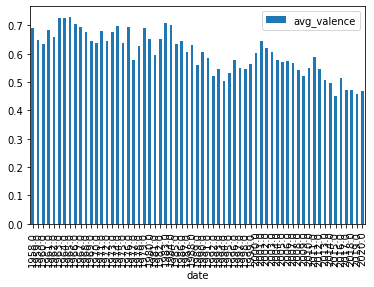

In [10]:
acousticness_bar = year_avgs_df.plot.bar('date', 'avg_valence')

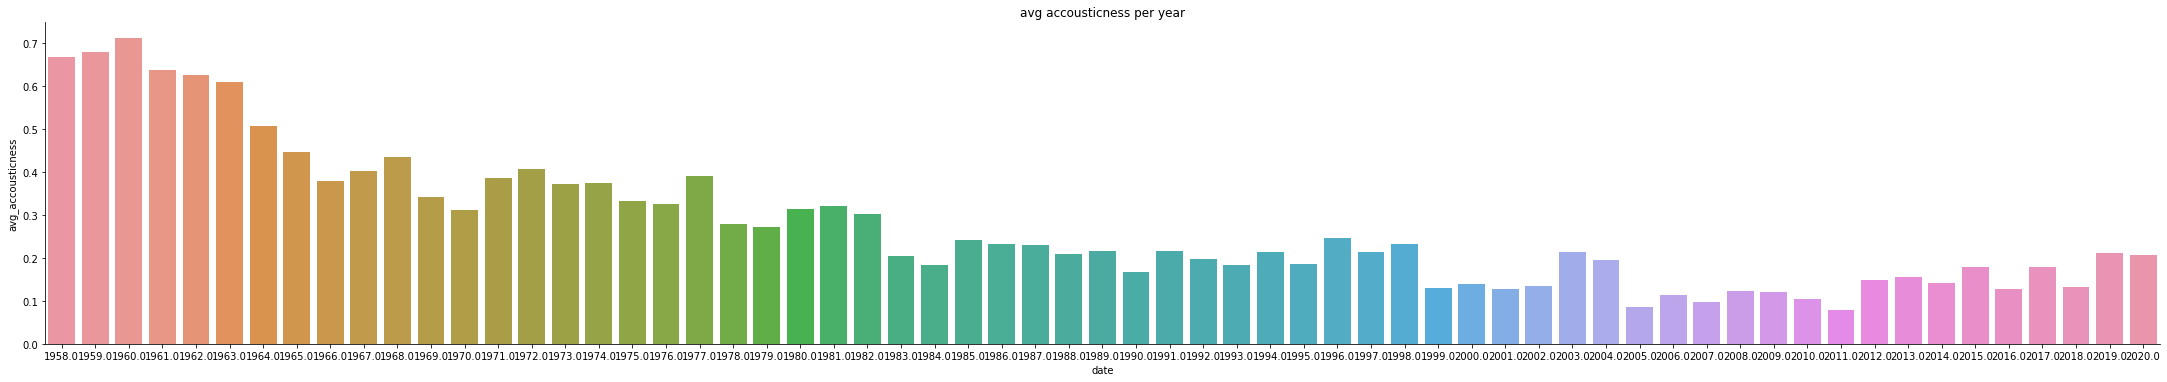

In [11]:
sns.catplot(data=year_avgs_df,
            kind="bar",
            x='date',
            y='avg_accousticness',
            height=5,
            aspect=6
            ).set(
                title='avg accousticness per year'
            )

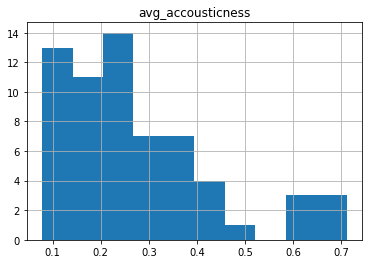

In [12]:
acousticness_hist = year_avgs_df.hist('avg_accousticness')